In [1]:

'''
This notebook is made to explore how a single hydrogen atom
(an electron bound to a proton) behaves inside a laser beam.

To simulate a laser beam, two 'infinitely long', oppositely charged barriers
will be placed in parallel, between which the hydrogen atom will sit.
This simulates the classical view of a laser beam - an oscillating electric
field.
'''

import numpy as np
from scipy.constants import pi

def potential(N,t):
    '''Sets the potential between the barriers and the charge on the barriers'''
    
    # the initial potential between the two barriers
    V  = np.zeros([N,N])
    
    # Charge on the barriers as a function of time
    V[:,0] = -A*np.sin(pi*t)
    V[:,-1] = A*np.sin(pi*t)
    
    # Create a copy to be used in the Jacobi update
    Vp = np.copy(V)

    return V,Vp


def jacobi_update(V,Vp):
    '''Updates the potential according to the Jacobi method.'''
    
    ΔV = 0.0
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Vp[i,j] = 0.25*(V[i-1,j] + V[i+1,j] + V[i,j+1] + V[i,j-1])
            ΔV += abs(Vp[i,j]-V[i,j])

    return ΔV


def getE(V):
    '''Computes the electric field from the potential'''

    # Initialize the E-Field arrays    
    Ex = np.zeros(V.shape)
    Ey = np.zeros_like(Ex)

    # Compute the electric field as the gradient of the potential
    for i in range(1,V.shape[0]-1):
        for j in range(1,V.shape[1]-1):
            Ex[i,j] = -0.5*(V[i,j+1]-V[i,j-1])
            Ey[i,j] = -0.5*(V[i+1,j]-V[i-1,j])

    # Return the electric field
    return Ex,Ey

def hydrogen(Ex,Ey):
    '''Creates an array as a vizualization of an electron
    bound to a proton moving with the electric field.
    The 'position' of the electron can be thought to roughly
    represent the center of the electron cloud which is
    distorted by the applied electric field.'''
    
    # initial H
    H = np.zeros([w,w],dtype=int)        
    H[w//2,w//2] = 2

    # Initial position of electron (negative numbers indicate
    # the electron is on the left side of proton, positive for right)
    n = -1

    # Electron position
    H[w//2,w//2+n] = 1

    # This loop updates the position of the electron according to
    # electric field strength
    for i in range(len(pos)):
        
        # positive E field
        if Ex[2,1] > (En[i] - En[0]) and Ex[2,1] < (En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = pos[i]
            H[w//2,w//2+n] = 1
        
        # negative E field
        elif Ex[2,1] < -(En[i] - En[0]) and Ex[2,1] > -(En[i+1] - En[0]):                     
        
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = -pos[i]
            H[w//2,w//2+n] = 1
            
        # maximum displacement
        elif Ex[2,1] > En[-1] - En[0]:
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 
            
            n = w//2
            H[w//2,-1] = 1
        
        # maximum displacement
        elif Ex[2,1] < -(En[-1] - En[0]):
            H = np.zeros([w,w],dtype=int)
            H[w//2,w//2] = 2 

            n = -w//2+1
            H[w//2,0] = 1
            
    return(H,n,ion)


In [2]:

# initialize the potential field
N = 5       # length/width of array where the potential will be calculated
A = 15      # max amplitude of the charge on the barriers
                # different max amplitudes will cause different max displacements of the electron
                # theoretically, if the max amplitude

# initialize the hydrogen atom
# set ionization = false, energy thresholds, width of the array, positions
ion = False
En = [-11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]
w = len(En)*2 - 1
pos = np.arange(1,w//2+1)

# the tolerance for convergence
ϵ = 1.0E-5

# write the output to hydrogen.txt
file = open('hydrogen.txt', 'w')
     
sinEx = []
sinEy = []
nlist=[]
tlist=[]
time_iters = np.linspace(0,4,1000)
for i in time_iters:
    
    V,Vp = potential(N,i)
    
    # Iterate until convergence
    ΔV = 1.0
    while ΔV/(N*N) > ϵ:
        ΔV = jacobi_update(V,Vp)
        ΔV += jacobi_update(Vp,V)
        
    Ex,Ey = getE(V)
    
    sinEx.append(Ex[2,1])
    sinEy.append(Ey[2,1])

    if ion == False:
        hy,n,ion = hydrogen(Ex,Ey)
        nlist.append(n)
        tlist.append(i)
        #print('{}, \tEx = {:.2f}, \tt = {:.4f} msec, \tPosition = {}'.format(hy[w//2], Ex[2,1], i, n))
        file.write('{}, \tEx = {:.2f}, \tt = {:.4f} msec, \tPosition = {}\n'.format(hy[w//2], Ex[2,1], i, n))

file.close()

# format sinE to 3 decimals    
for i in range(len(sinEx)):
    sinEx[i]=float('%.1f'%sinEx[i])
    

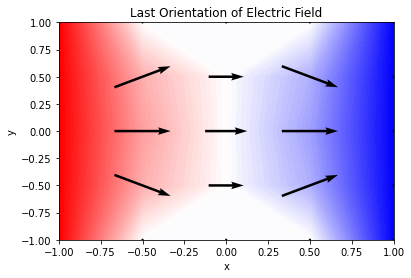

Ex = 3.67394039744206e-15


'Last orientation of the electric field. Note that the hydrogen atom is located at (-0.50, 0.00) on this plot.'

In [3]:

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

X,Y = np.meshgrid(np.linspace(-1.0,1.0,N),np.linspace(-1.0,1.0,N))

plt.contourf(X,Y,V,100, cmap='bwr')
plt.quiver(X,Y,Ex,Ey,pivot='mid')
plt.axis([-1.0,1.0,-1.0,1.0])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Last Orientation of Electric Field')
plt.show()

print(f'Ex = {Ex[2,1]}')

'''Last orientation of the electric field. Note that the hydrogen atom is located at (-0.50, 0.00) on this plot.'''


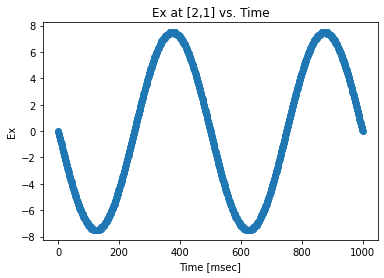

'x-component of the electric field vs. time at the point where the atom is located'

In [4]:

plt.plot(sinEx,'o')
plt.title('Ex at [2,1] vs. Time')
plt.xlabel('Time [msec]')
plt.ylabel('Ex')
plt.show()

'''x-component of the electric field vs. time at the point where the atom is located'''


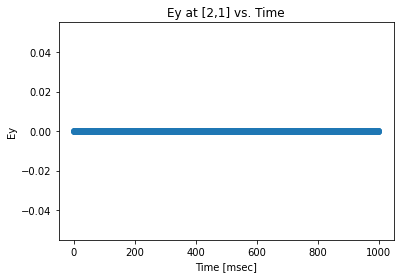

'y-component'

In [5]:

plt.plot(sinEy,'o')
plt.title('Ey at [2,1] vs. Time')
plt.xlabel('Time [msec]')
plt.ylabel('Ey')
plt.show()

'''y-component'''


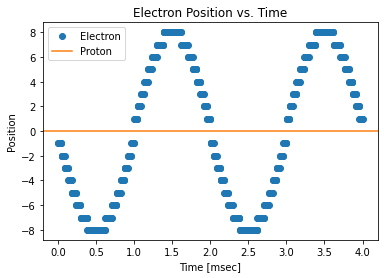

In [6]:

plt.plot(tlist,nlist,'o',label='Electron')
plt.title('Electron Position vs. Time')
plt.xlabel('Time [msec]')
plt.ylabel('Position')
plt.axhline(y=0,label='Proton',c=colors[1])
plt.legend()
plt.show()
